# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

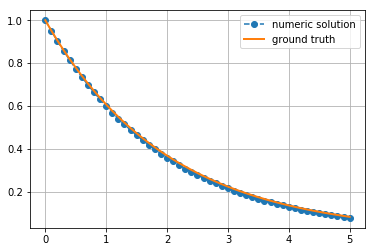

In [10]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

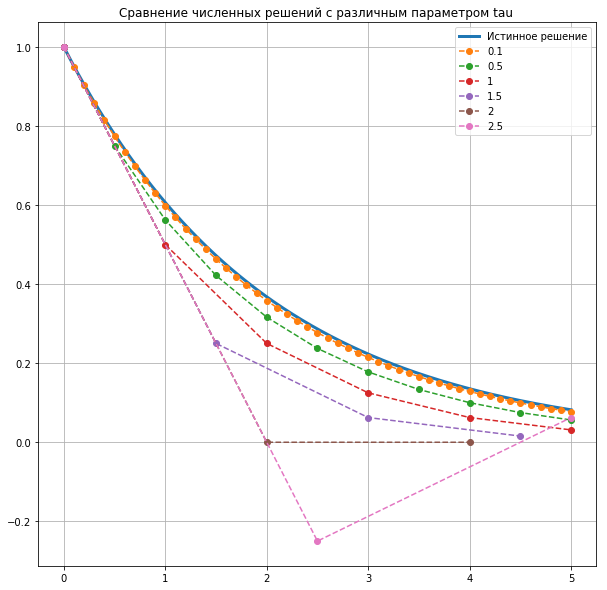

In [14]:
plt.figure(figsize=(10, 10))
x_grid = np.linspace(0, 5, int(1e3))
plt.plot(x_grid, np.exp(lam*x_grid), '-', lw=3, label='Истинное решение')

for tau in [0.1, 0.5, 1, 1.5, 2, 2.5]:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.title('Сравнение численных решений с различным параметром tau ')
    plt.plot(tt, y, 'o--', label=tau)
    plt.legend()

plt.grid()   
plt.show()

Видно, что при уменьшении tau алгоритм все больше сходится к истине

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [15]:
def implicit_euler_solve(lam, u0, T, dt):
    """
    Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method.
    """
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] /(1 - dt * lam)
    return tt, y

tau =  0.1


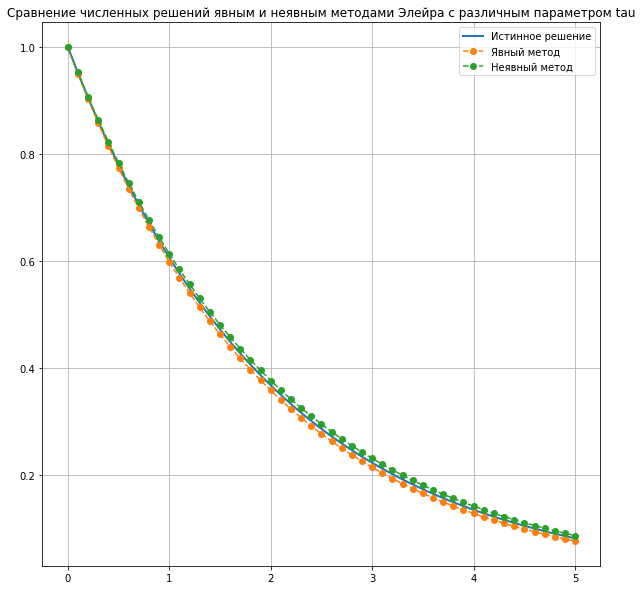

tau =  0.5


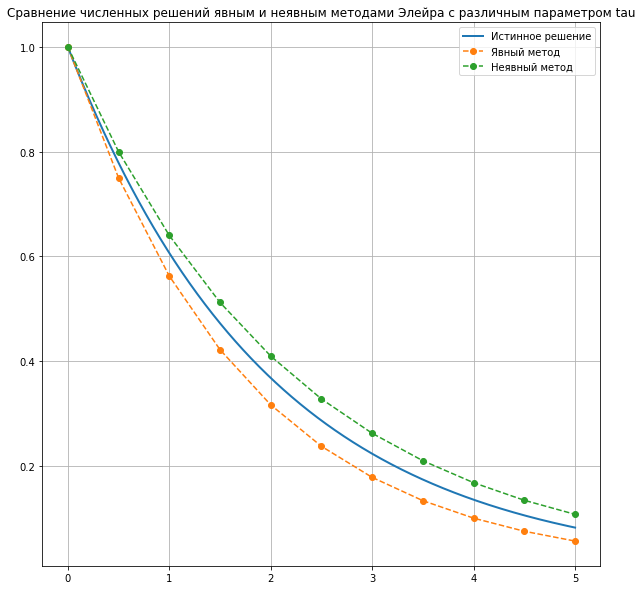

tau =  1


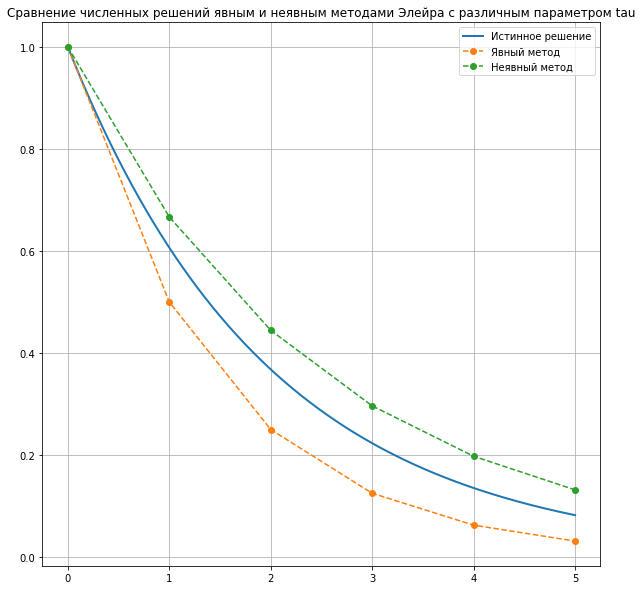

tau =  1.5


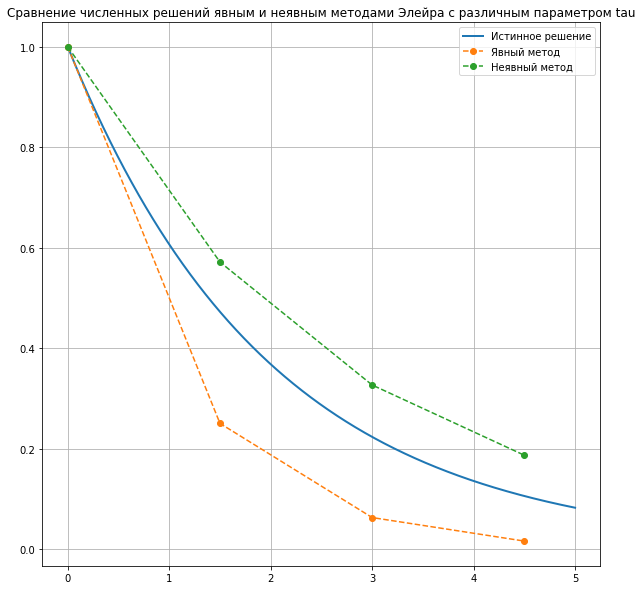

tau =  2


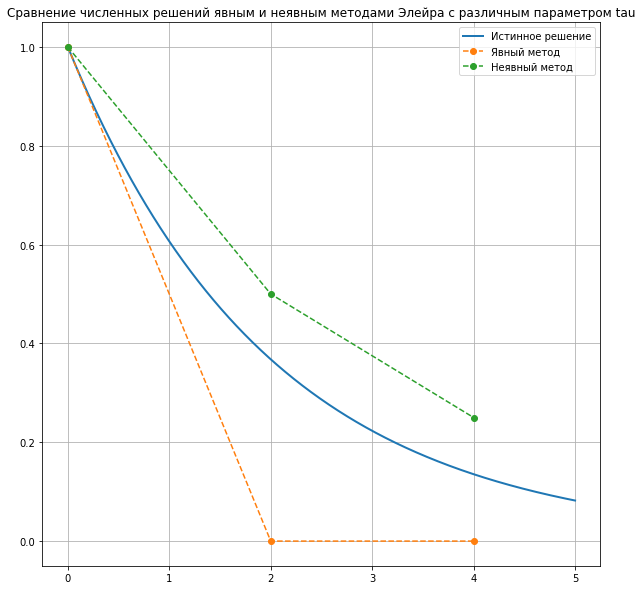

tau =  2.5


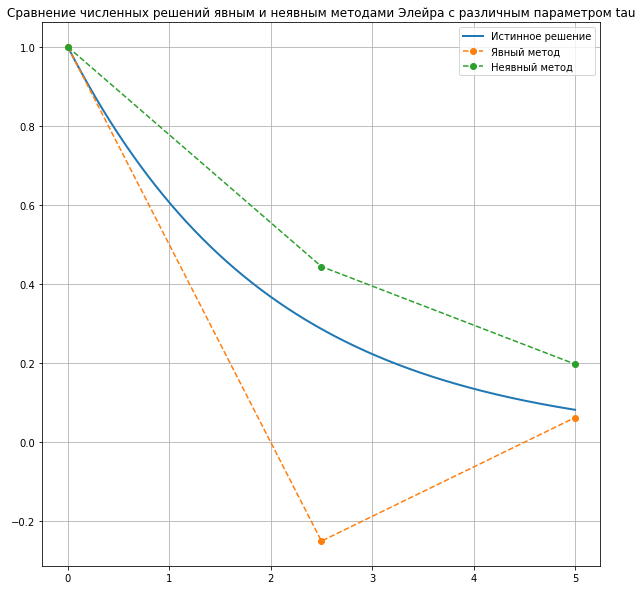

In [17]:
x_grid = np.linspace(0, 5, int(1e3))
for tau in [0.1, 0.5, 1, 1.5, 2, 2.5]: 
    print('tau = ',tau)
    plt.figure(figsize=(10, 10))
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=tau)
    tt_imp, y_imp = implicit_euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.title('Сравнение численных решений явным и неявным методами Элейра с различным параметром tau')
    plt.plot(x_grid, np.exp(lam*x_grid), '-', lw=2, label='Истинное решение')
    plt.plot(tt, y, 'o--', label='Явный метод')
    plt.plot(tt_imp, y_imp, 'o--', label='Неявный метод')
    plt.legend()
    plt.grid() 
    plt.show()

Видно, что отличие в методах заключается:
а) Явный стремится к истинному решению снизу, а неявный сверху;
б) при lamda * tau>1 неявный метод ведет себя лучше 

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [18]:
def systems_euler_solve(A, u0, T, dt):

    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty((num_steps + 1, 2))
    y[0,:] = u0

    for k in range(num_steps):
        y[k+1, :] = y[k, :] + dt * (A @ y[k, :])
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

/Users/kirillsikamov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':


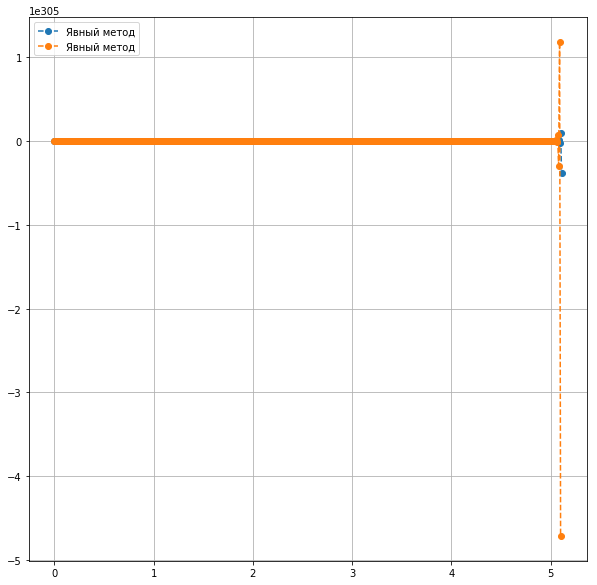

In [36]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])
tau = 0.01
eigenvalues = np.linalg.eigvals(A)
tt_exp, y_exp = systems_euler_solve(A, u0, 15, tau)
plt.figure(figsize=(10, 10))
plt.title('')
plt.plot(tt_exp, y_exp, 'o--', label='Явный метод')
plt.legend()
plt.grid() 
plt.show()

Видно, что алгоритм рассходится

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [20]:
def implicit_systems_euler_solve(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty((num_steps + 1, 2))
    y[0,:] = u0
    for k in range(num_steps):
        y[k+1, :] = np.linalg.solve((np.eye(2) - dt * A), y[k, :])
    return tt, y

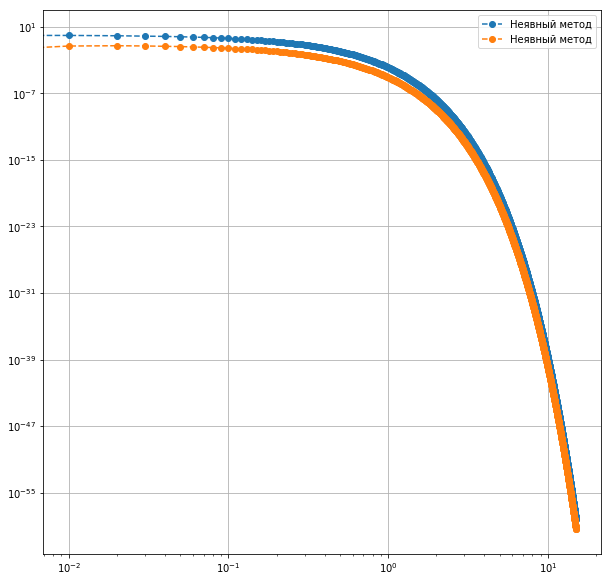

In [34]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])
tau = 0.01
eigenvalues = np.linalg.eigvals(A)
tt_imp, y_imp = implicit_systems_euler_solve(A, u0, 15., tau)
plt.figure(figsize=(10, 10))
plt.title('')
plt.plot(tt_imp, y_imp, 'o--', label='Неявный метод')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid() 
plt.show()

Видно, что алгоритм сошелся

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

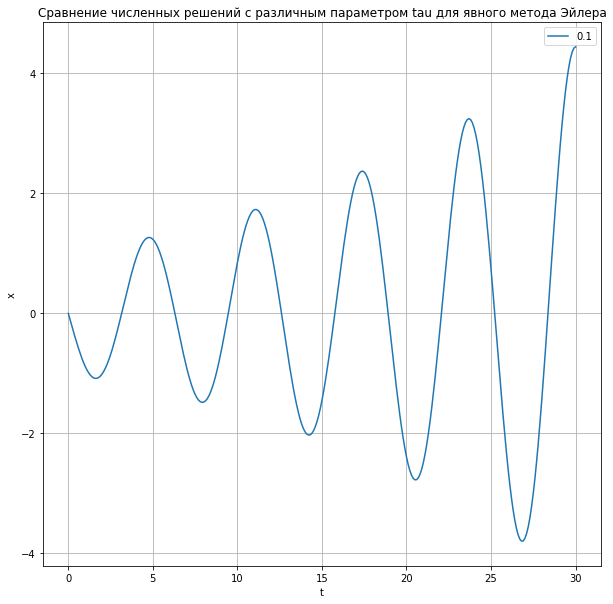

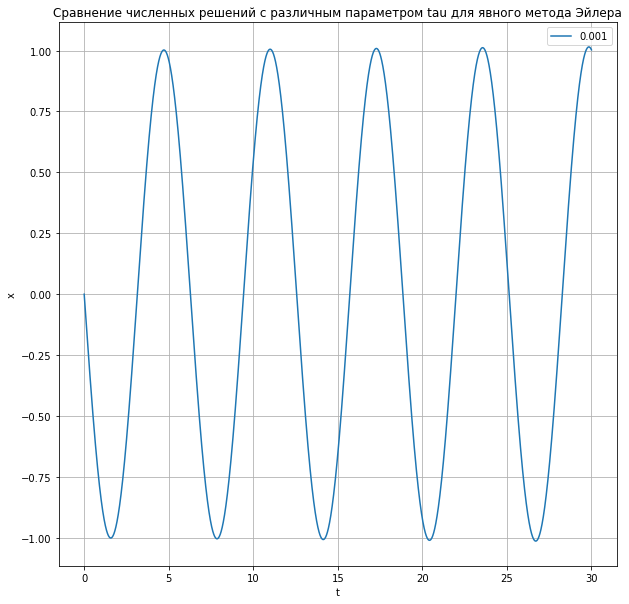

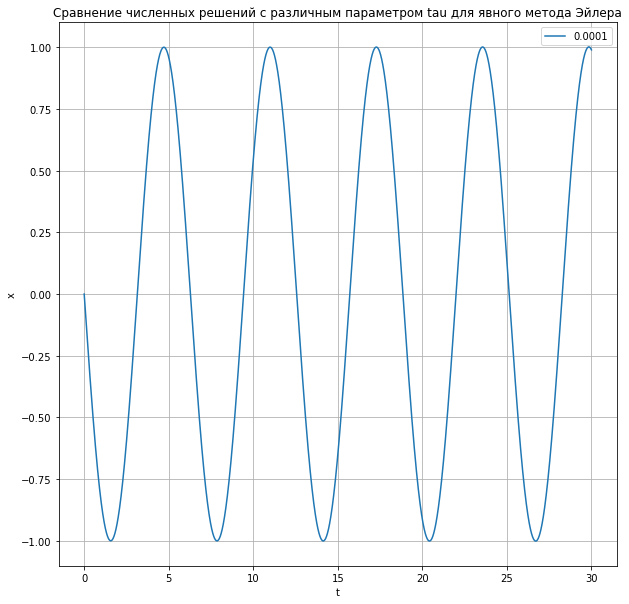

In [94]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
for tau in [0.1, 0.001, 0.0001]:
    yy=[]
    t=[]
    plt.figure(figsize=(10, 10))
    tt, y = systems_euler_solve(A, u0, 30., tau)
    for i in range(len(y)):
            yy.append(y[i][0])
            t.append(tt[i])       
    plt.plot(t, yy, label=tau)
    plt.title('Сравнение численных решений с различным параметром tau для явного метода Эйлера')
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.grid()
    plt.show()

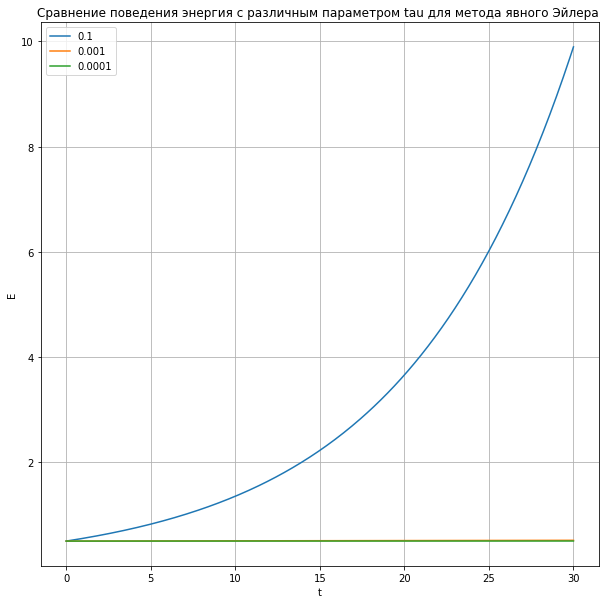

In [95]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
plt.figure(figsize=(10, 10))

for tau in [0.1, 0.001, 0.0001]:
    tt, y = systems_euler_solve(A, u0, 30., tau)
    E = y[:, 1] ** 2 / 2+ w ** 2 * y[:, 0] ** 2 / 2
    plt.plot(tt, E, label=tau)
plt.title('Сравнение поведения энергия с различным параметром tau для метода явного Эйлера ')
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()
plt.show()


In [68]:
def Runge_Kutta(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, 2])
    y[0, :] = u0
    for k in range(num_steps):
        temp_var = y[k, :] + dt * (A @ y[k, :]) / 2
        y[k+1, :] = y[k, :] + dt * (A @ temp_var)
    return tt, y

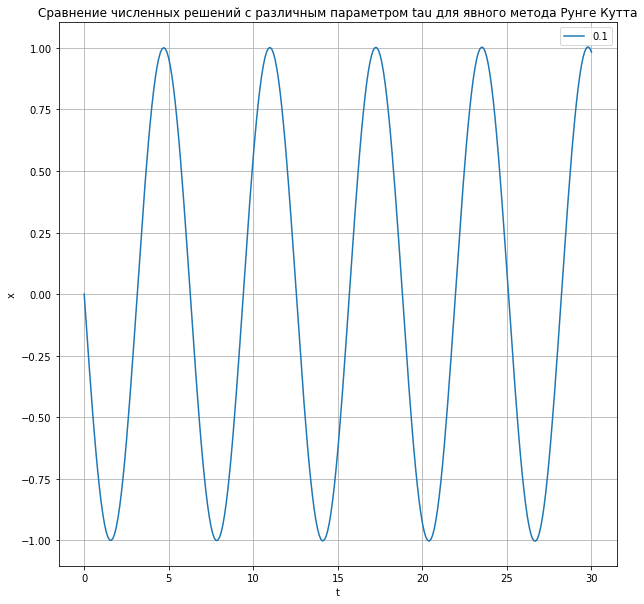

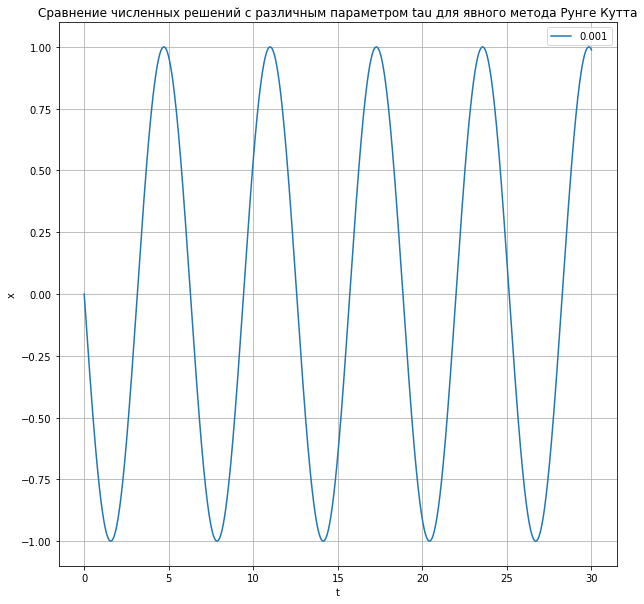

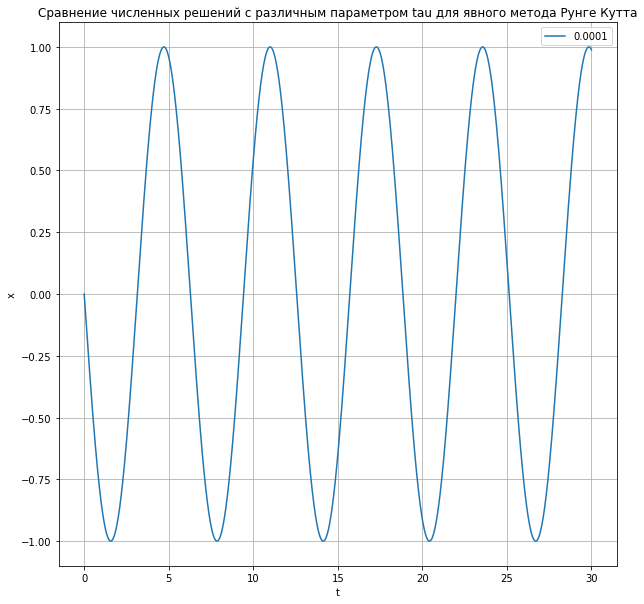

In [96]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
for tau in [0.1, 0.001, 0.0001]:
    yy=[]
    t=[]
    plt.figure(figsize=(10, 10))
    tt, y = Runge_Kutta(A, u0, 30., tau)
    for i in range(len(y)):
            yy.append(y[i][0])
            t.append(tt[i])       
    plt.plot(t, yy, label=tau)
    plt.title('Сравнение численных решений с различным параметром tau для явного метода Рунге Кутта')
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.grid()
    plt.show()

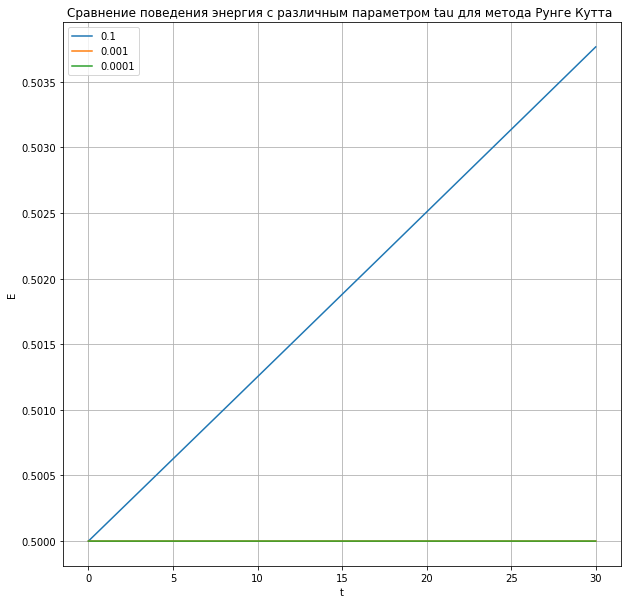

In [97]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
plt.figure(figsize=(10, 10))

for tau in [0.1, 0.001, 0.0001]:
    tt, y = Runge_Kutta(A, u0, 30., tau)
    E = y[:, 1] ** 2 / 2+ w ** 2 * y[:, 0] ** 2 / 2
    plt.plot(tt, E, label=tau)
plt.title('Сравнение поведения энергия с различным параметром tau для метода Рунге Кутта ')
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()
plt.show()

tau=  0.1


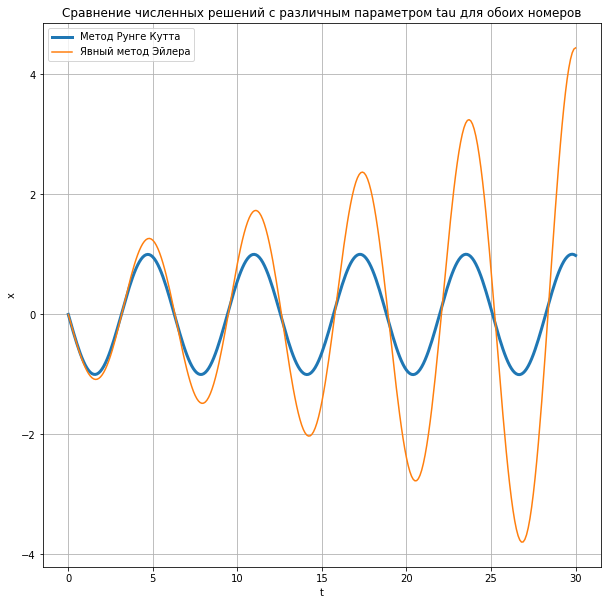

tau=  0.001


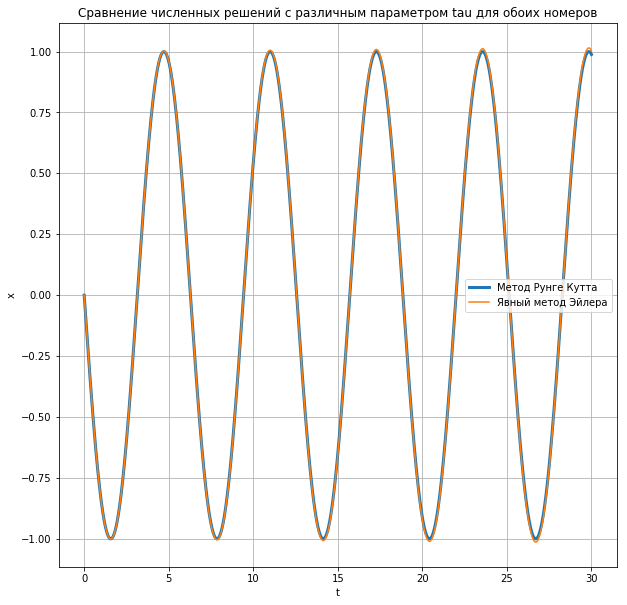

tau=  0.0001


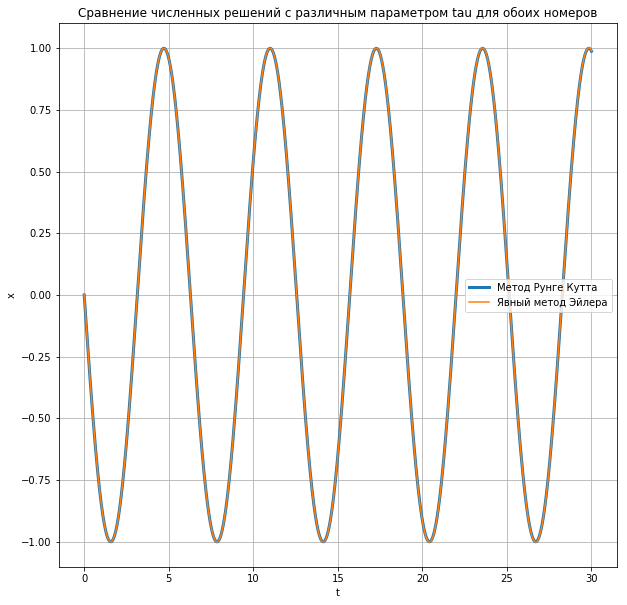

In [98]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
for tau in [0.1, 0.001, 0.0001]:
    print('tau= ', tau)
    yy_ru=[]
    t_ru=[]
    yy=[]
    t=[]
    plt.figure(figsize=(10, 10))
    tt_ru, y_ru = Runge_Kutta(A, u0, 30., tau)
    tt, y = systems_euler_solve(A, u0, 30., tau)
    for i in range(len(y)):
            yy_ru.append(y_ru[i][0])
            t_ru.append(tt_ru[i]) 
            yy.append(y[i][0])
            t.append(tt[i])  
    plt.plot(t_ru, yy_ru,lw=3, label='Метод Рунге Кутта')
    plt.plot(t, yy, label='Явный метод Эйлера')
    plt.title('Сравнение численных решений с различным параметром tau для обоих номеров')
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.grid()
    plt.show()
    

tau=  0.1


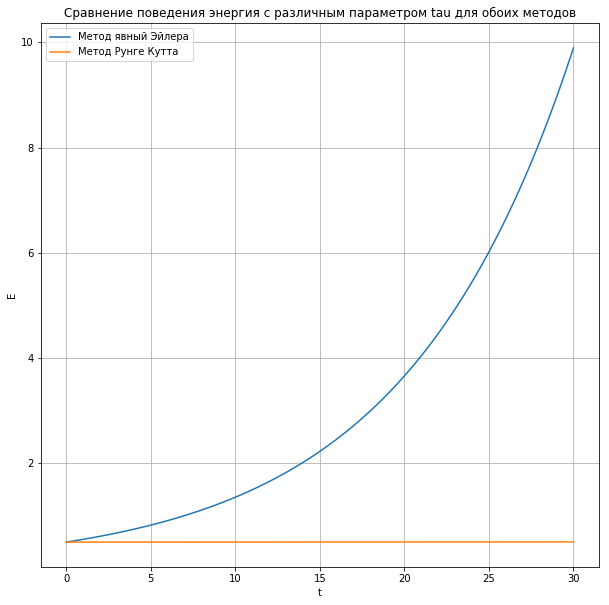

tau=  0.001


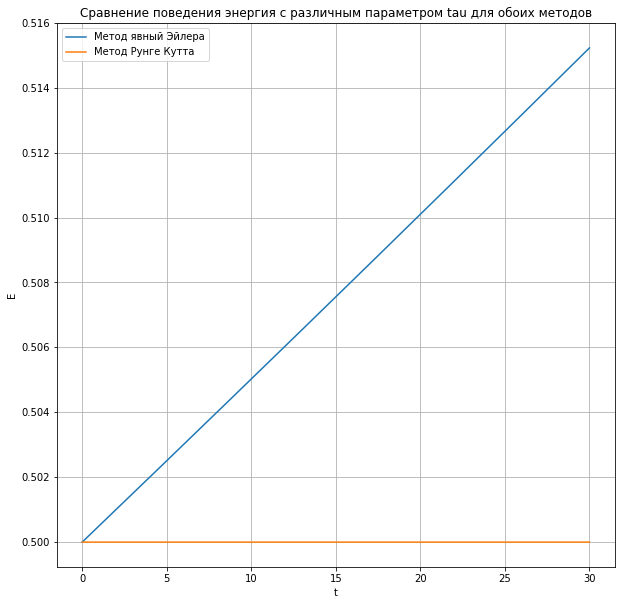

tau=  0.0001


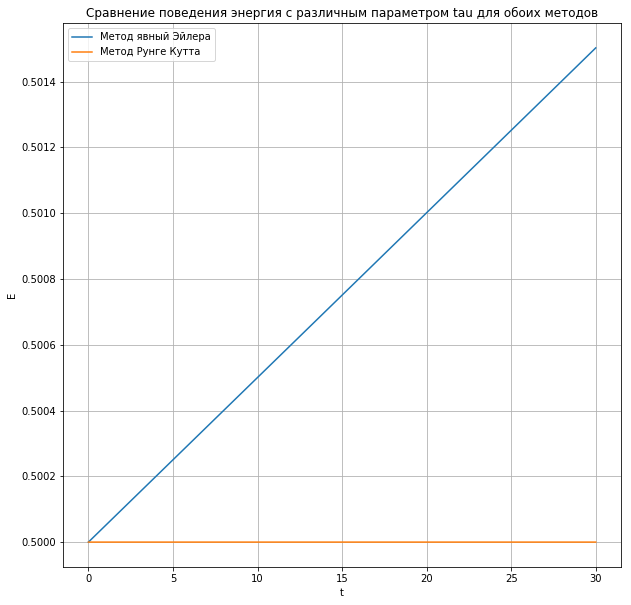

In [99]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])


for tau in [0.1, 0.001, 0.0001]:
    print('tau= ', tau)
    tt, y = systems_euler_solve(A, u0, 30., tau)
    tt_ru, y_ru = Runge_Kutta(A, u0, 30., tau)
    E = y[:, 1] ** 2 / 2+ w ** 2 * y[:, 0] ** 2 / 2
    E_ru = y_ru[:, 1] ** 2 / 2+ w ** 2 * y_ru[:, 0] ** 2 / 2
    plt.figure(figsize=(10, 10))
    plt.plot(tt, E, label='Метод явный Эйлера')
    plt.plot(tt_ru, E_ru, label='Метод Рунге Кутта')
    plt.title('Сравнение поведения энергия с различным параметром tau для обоих методов')
    plt.xlabel("t")
    plt.ylabel("E")
    plt.grid()
    plt.legend()
    plt.show()

Вывод: Из всех проведенных тестов можно заявить, что:
a) Оба метода ведут себя хорошо, при малых параметрах tau, однако при больших tau метод Эйлера заметно расходится с методом РК
б) Поведение энерги хоть и нельзя назвать сохраняющимся, однако для обоих методов при уменьшении tau энергия все больше и больше похожа на сохраняющуюся величину,  что и обьесняется вычислительной не точностью методов. Что касается сравнения РК и Эйлера, то РК при тех же самых tau выдает более высокую точность решения, что сказывается на виде зависимости E(t)